In [657]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

In [658]:
#parameters
lambda_param = 4 #rate parameter

n = 100000 #amount of uniform realizations

cutoff = n/10000 #percentage that is deemed negligible

unif_num = np.random.uniform(0,1,n) #uniform realizations stored in an array
wait_time = np.zeros(n) #iid exponential wait times

total_poisson_intervals = 0 #total amount of time intervals observed
arr_events = [] #array to store number of events per interval

time = 0 
current_events = 0

#add wait times until they total over one time interval adding the occurred events to the array
for i in range (n):

    wait_time[i] = -math.log(unif_num[i]) / lambda_param #transform U(0,1) to wait times for poisson
    time += wait_time[i] #add wait time to get to the next poisson event

    if(time < 1): #if the next event occured in the interval

        current_events +=1 #increment events in this interval

    if(time > 1): #if the next event happened after the interval

        arr_events.append(current_events) #add number of occurred events to the array
        time = 0 #reset time to 0
        current_events = 0 #reset events to 0
        total_poisson_intervals +=1 #increment intervals observed

dict_events = Counter(arr_events) #create dictionary of key-value pairs

for j in dict_events:

    if(dict_events[j] > cutoff): #if not negligible

        dict_events[j] = dict_events[j] * (1/total_poisson_intervals) #reformat as percentage
        last = j #last value above cutoff
    
    else:
        
        dict_events[j] = 0 #set negligible values to 0

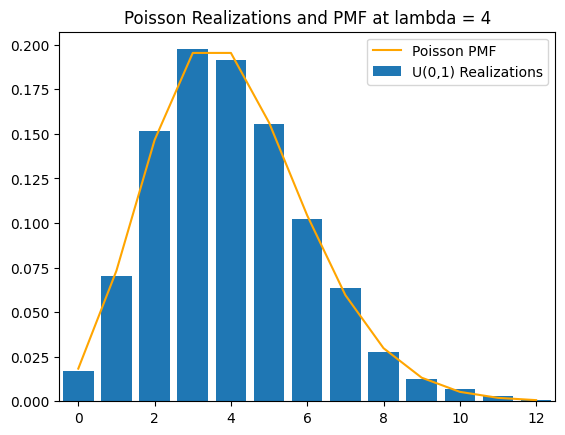

In [659]:
#create the PMF to compare the realizations to
x_positions = range(0, last+1) #range of pmf
pmf = np.zeros(last+1)

for k in range(last+1):
    pmf[k] = math.exp(-lambda_param) * lambda_param**k / math.factorial(k) #e^(-lambda) * lambda^x / x!

x_titles = list(dict_events.keys()) #number of events per interval
heights = list(dict_events.values()) #percentages of events per interval
plot_title = f"Poisson Realizations and PMF at lambda = {lambda_param}"

plt.title(plot_title)

plt.bar(x_titles, heights, label = "U(0,1) Realizations")
plt.plot(pmf, color = "orange", label='Poisson PMF')
plt.legend()
plt.xlim(-0.5, last+0.5)
plt.show()